In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# preprocessing library
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [3]:
dataset = "dataset.csv"

data = pd.read_csv(dataset, dtype={'sentimen' : 'string', 'Tweet' : 'string'})
data.dropna(inplace=True)
data = data.loc[data['sentimen'].isin(['0', '1', '2'])]
feature = data['Tweet'].to_numpy()
label = data['sentimen'].to_numpy()

In [4]:
# filtering
filter_feature = [re.sub('[^A-Za-z]+', ' ', text).strip().lower() for text in feature]

# stop worfd removing
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
removed_stopwords = [stopword.remove(text) for text in filter_feature]


In [5]:
# split dataset
x_train, x_test, y_train, y_test = train_test_split(removed_stopwords, label, test_size=0.2, shuffle=True, random_state=0)

In [22]:
# convert text to numeric

vectorizer = CountVectorizer()
x_vector_train = vectorizer.fit_transform(x_train)
x_vector_test = vectorizer.transform(x_test)

x_vector_train = x_vector_train.toarray()
x_vector_test = x_vector_test.toarray()

In [9]:
print(x_vector_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
x_vector_train.shape

(9845, 21529)

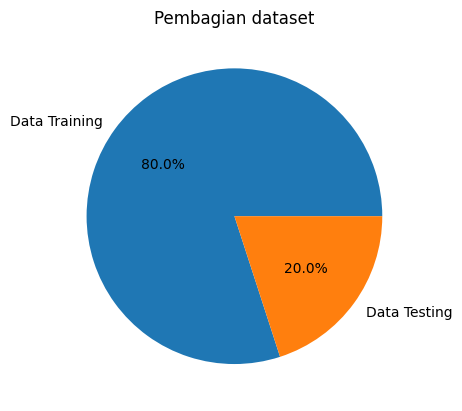

In [10]:
# viasualize data split
labels = ['Data Training', 'Data Testing']
sizes = [len(x_train), len(x_test)]

plt.Figure(figsize=(2,2))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Pembagian dataset')
plt.show()

In [12]:
model = GaussianNB()
model.fit(x_vector_train, y_train)

GaussianNB()

In [13]:
# export model to json
import joblib

joblib.dump(model, 'model.joblib')

['model.joblib']

In [65]:
model = joblib.load('model.joblib')
print(type(model))

<class 'sklearn.naive_bayes.GaussianNB'>


In [ ]:
!tensorflowjs_converter --input_format=tfjs_layers_model --output_format=tfjs_graph_model model.json tfjs_model

In [40]:
predictions = model.predict(x_test[[1]])
print(predictions)

['0']


In [ ]:
for sentence in x_test[0:200]:
    print(vectorizer.inverse_transform([sentence]))
    predictions = model.predict([sentence])
    print(predictions)

In [41]:
accuracy = model.score(x_test, y_test)
print(accuracy)

0.49471974004874086
